In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_paths = {
    "Colitis_Ulcerative": "Colitis&Ulcerative_combined.csv",
    "Crohn_Disease": "Crohn_Disease_combined.csv",
    "Health": "Health_combined.csv",
    "Irritable_Bowel_Syndrome": "lrritable_Bowel_Syndrome_combined.csv",
    "Obesity": "Obesity_combined.csv"
}

In [3]:
df_list = []
for label, path in file_paths.items():
    df = pd.read_csv(path)
    df['label'] = label  # 为每个数据集添加label字段，表示疾病类型
    df_list.append(df)

In [5]:
combined_df = pd.concat(df_list, ignore_index=True)

In [6]:
abundance_columns = combined_df.columns[5:14]

/var/folders/kh/dw9mptt94mv470vbxdf3ckhm0000gn/T/ipykernel_17945/1025342857.py:10: UserWarning: Glyph 30142 (\N{CJK UNIFIED IDEOGRAPH-75BE}) missing from current font.
  plt.tight_layout()
/var/folders/kh/dw9mptt94mv470vbxdf3ckhm0000gn/T/ipykernel_17945/1025342857.py:10: UserWarning: Glyph 30149 (\N{CJK UNIFIED IDEOGRAPH-75C5}) missing from current font.
  plt.tight_layout()
/var/folders/kh/dw9mptt94mv470vbxdf3ckhm0000gn/T/ipykernel_17945/1025342857.py:10: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  plt.tight_layout()
/var/folders/kh/dw9mptt94mv470vbxdf3ckhm0000gn/T/ipykernel_17945/1025342857.py:10: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  plt.tight_layout()
/var/folders/kh/dw9mptt94mv470vbxdf3ckhm0000gn/T/ipykernel_17945/1025342857.py:10: UserWarning: Glyph 20016 (\N{CJK UNIFIED IDEOGRAPH-4E30}) missing from current font.
  plt.tight_layout()
/var/folders/kh/dw9mptt94mv470vbxdf3ckhm0000gn/T/ipyker

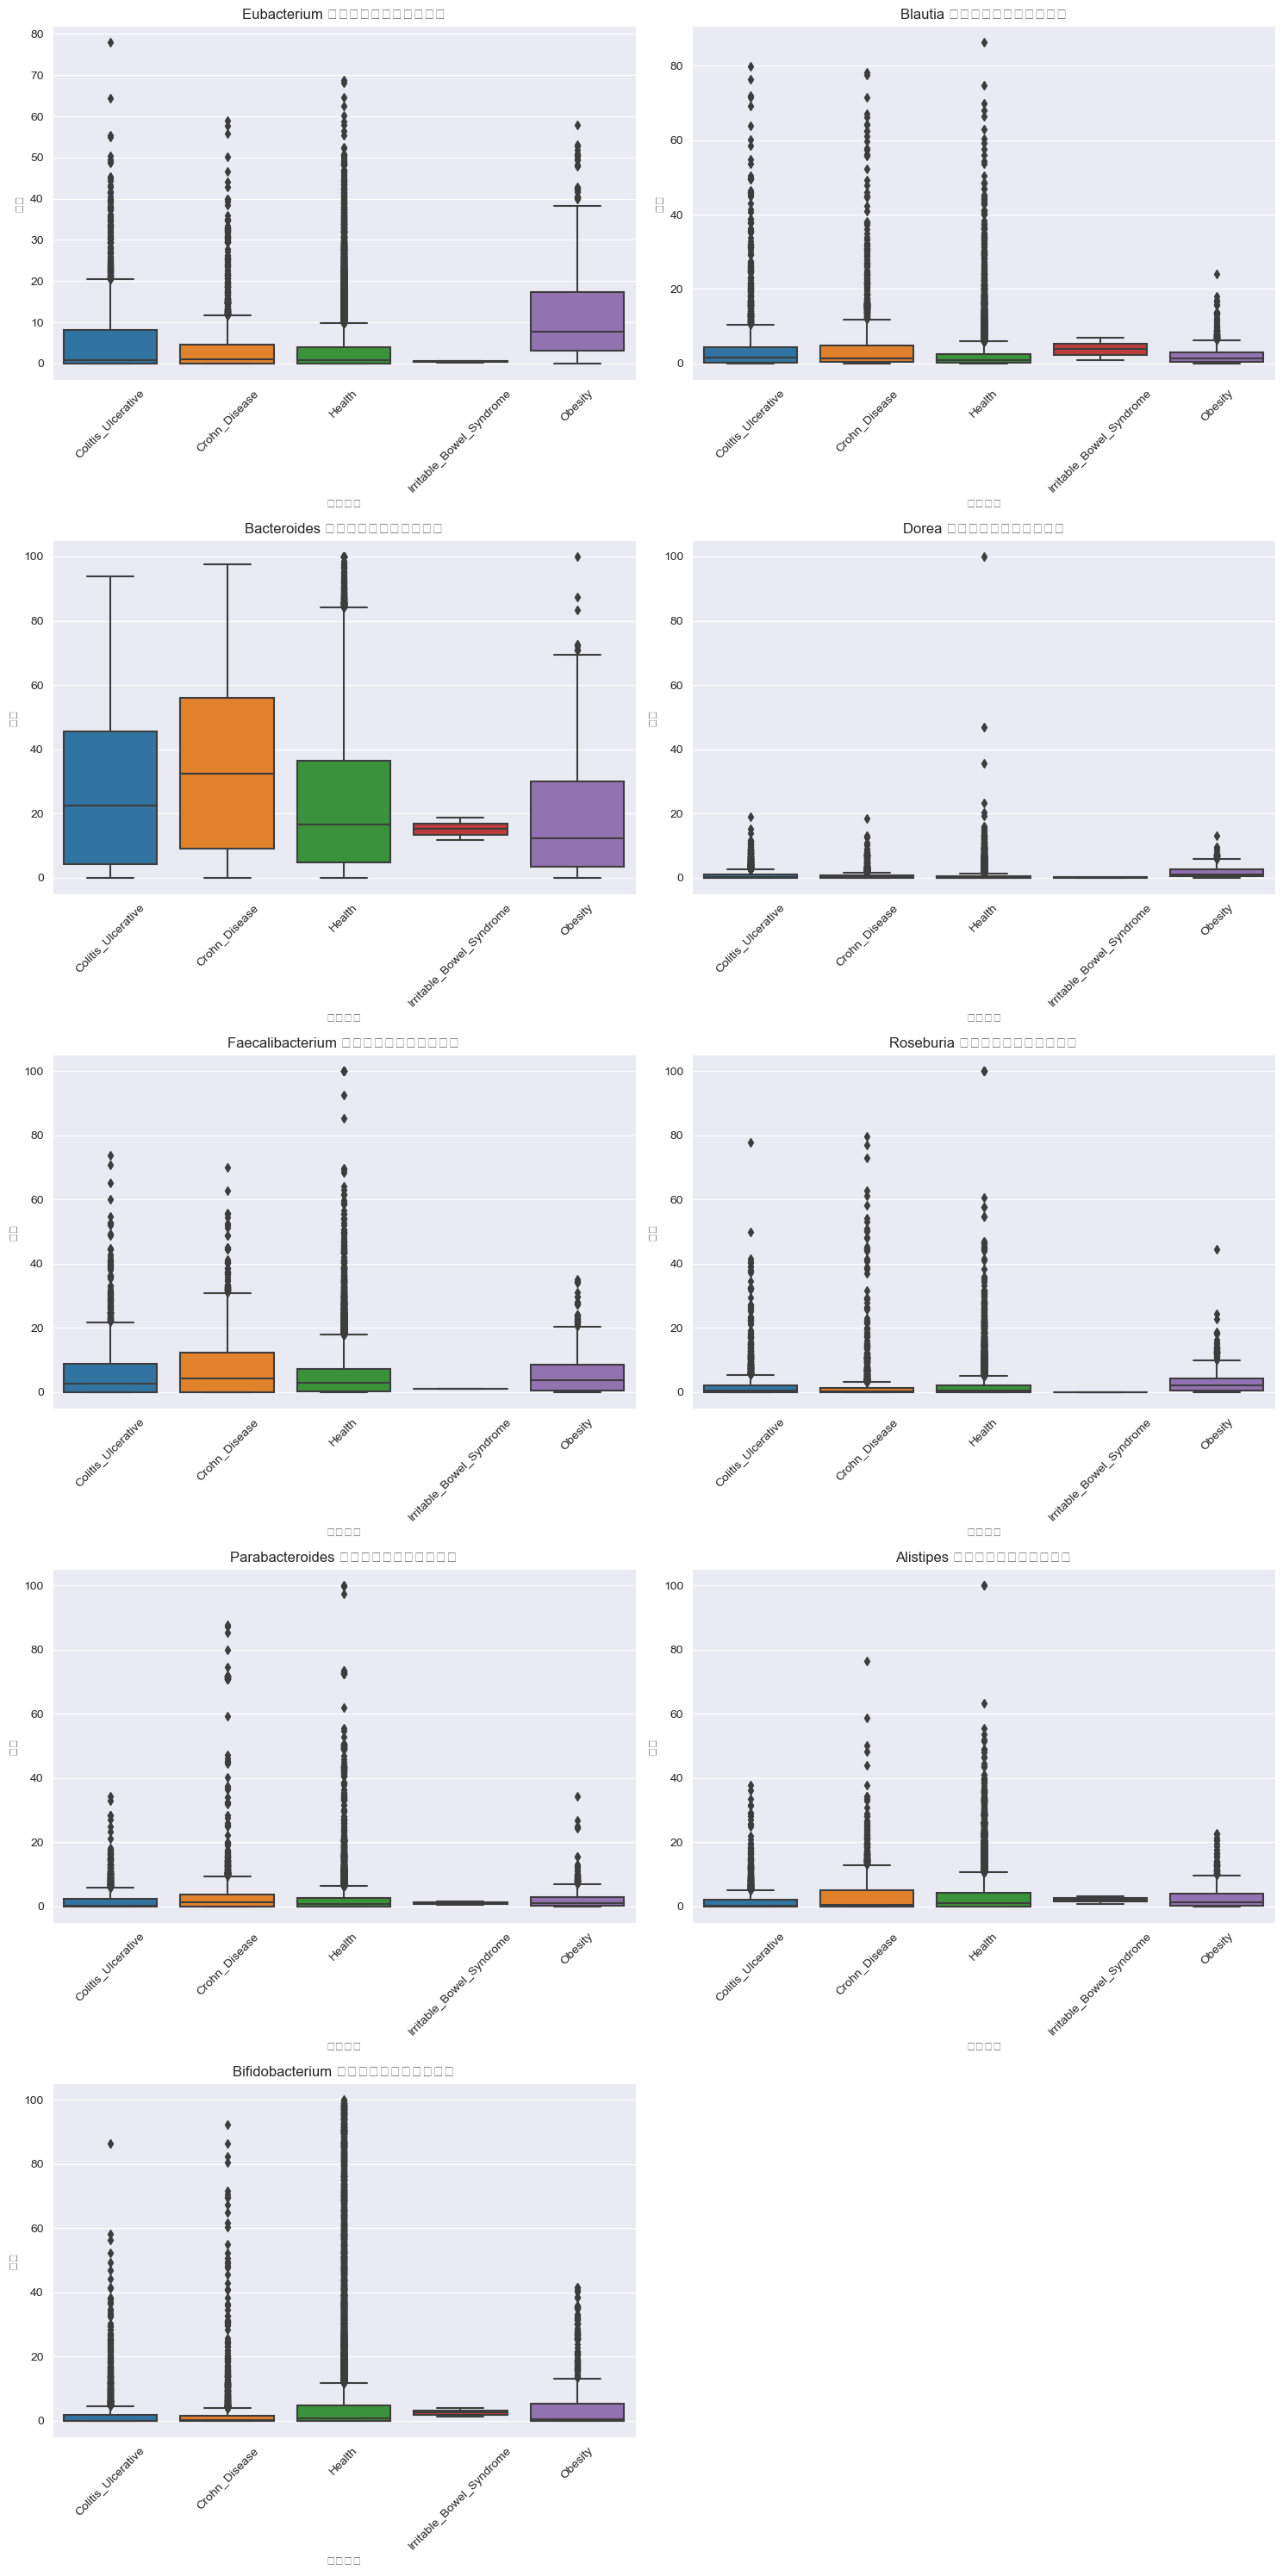

In [7]:
plt.figure(figsize=(15, 30))
for i, col in enumerate(abundance_columns, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x="label", y=col, data=combined_df)
    plt.title(f"{col} 丰度在不同疾病中的分布")
    plt.xticks(rotation=45)
    plt.xlabel("疾病类型")
    plt.ylabel("丰度")

plt.tight_layout()
plt.show()